In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Table: iMPI function call runtime

In [6]:
#====== Set these before plotting ======
logfile = open('output/swe_impi_local2n2t_console.log','r')
#=======================================

probe_adapt_count = 0
probe_adapt_time_sum = 0.0
probe_adapt_time_avg = 0.0

adapt_begin_count = 0
adapt_begin_time_sum = 0.0
adapt_begin_time_avg = 0.0

adapt_commit_count = 0
adapt_commit_time_sum = 0.0
adapt_commit_time_avg = 0.0

joining_probe_adapt_count = 0
joining_probe_adapt_time_sum = 0.0
total_adapt_count = 0
total_adapt_time_sum = 0.0
total_adapt_time_avg = 0.0

for line in logfile:    
    # only count the staying ranks' probe_adapt time
    if "(4): probe_adapt" in line:
        line = line.split()
        probe_adapt_time_sum += float(line[-2])
        probe_adapt_count += 1
        
    if "adapt_begin" in line:
        line = line.split()
        adapt_begin_time_sum += float(line[-8])
        adapt_begin_count += 1

    if "(4): adapt_commit" in line:
        line = line.split()
        adapt_commit_time_sum += float(line[-2])
        adapt_commit_count += 1
        
    # need the joining ranks probe adapt time to properly compute total adapt time
    if "(3): probe_adapt" in line:
        line = line.split()
        joining_probe_adapt_time_sum += float(line[-2])
        joining_probe_adapt_count += 1 
        
    if "Total adaption time" in line:
        line = line.split()
        total_adapt_time_sum += float(line[-2])
        total_adapt_count += 1 
        
probe_adapt_time_avg = probe_adapt_time_sum / probe_adapt_count
adapt_begin_time_avg = adapt_begin_time_sum / adapt_begin_count
adapt_commit_time_avg = adapt_commit_time_sum / adapt_commit_count

# We want to subtract all the "total adaption time" contributed by the joining ranks
total_adapt_time_sum -= joining_probe_adapt_time_sum
total_adapt_time_sum -= probe_adapt_time_avg * joining_probe_adapt_count
total_adapt_time_sum -= adapt_begin_time_avg * joining_probe_adapt_count
total_adapt_time_sum -= adapt_commit_time_avg * joining_probe_adapt_count

total_adapt_count -= joining_probe_adapt_count

total_adapt_time_avg = total_adapt_time_sum / total_adapt_count


print('probe_adapt --- count: {}, sum: {} sec, avg: {} sec'.format(probe_adapt_count, 
        probe_adapt_time_sum, probe_adapt_time_avg))

print('adapt_begin --- count: {}, sum: {} sec, avg: {} sec'.format(adapt_begin_count, 
        adapt_begin_time_sum, adapt_begin_time_avg))

print('adapt_commit --- count: {}, sum: {} sec, avg: {} sec'.format(adapt_commit_count, 
        adapt_commit_time_sum, adapt_commit_time_avg))

print('total adapt --- count: {}, sum: {} sec, avg: {} sec'.format(total_adapt_count, 
        total_adapt_time_sum, total_adapt_time_avg))


probe_adapt --- count: 144, sum: 0.08920690999999997 sec, avg: 0.0006194924305555553 sec
adapt_begin --- count: 32, sum: 28.267231259999996 sec, avg: 0.8833509768749999 sec
adapt_commit --- count: 16, sum: 1.20773578 sec, avg: 0.07548348625 sec
total adapt --- count: 14, sum: 20.67162306444444 sec, avg: 1.4765445046031742 sec


## Figure: # of Cells vs. Exec Time, static MPI

In [6]:
#====== Set these before plotting ======
logfile = open('output/swe_mpi_local2n2t_console.log','r')
totalranks = 4
#=======================================

# 1. Generate data series
elaptime = []
ncells = []
for line in logfile:
    if "sec elapsed" in line:
        line = line.split()
        elaptime = elaptime + [float(line[-5])]
        ncells = ncells + [int(line[-2]) * totalranks] 
    
    if "elapsed time (sec)" in line:
        line = line.split()   
        elaptime = elaptime + [float((line[-3])[:-1])]
        ncells = ncells + [int(line[-1]) * totalranks]
logfile.close()

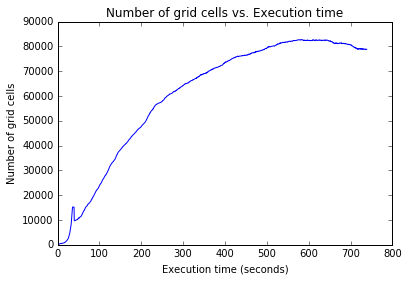

In [9]:
# 2. Plot
plt.figure(1)
plt.plot(elaptime, ncells)
plt.title('Number of grid cells vs. Execution time')
plt.xlabel('Execution time (seconds)')
plt.ylabel('Number of grid cells')

In [18]:
import itertools

x = []

for i in range(0,10):
    x = x + [i]
    
print(x)




[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
